<a href="https://colab.research.google.com/github/EthanZash/Seminario-de-Inteligencia-Artificial-1/blob/main/Algoritmo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

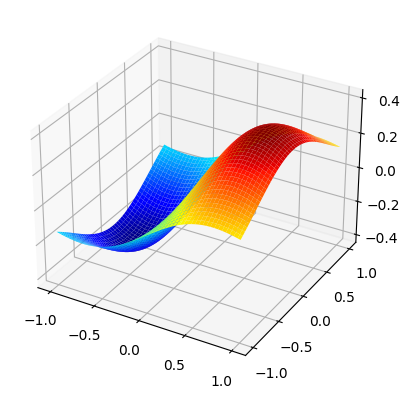

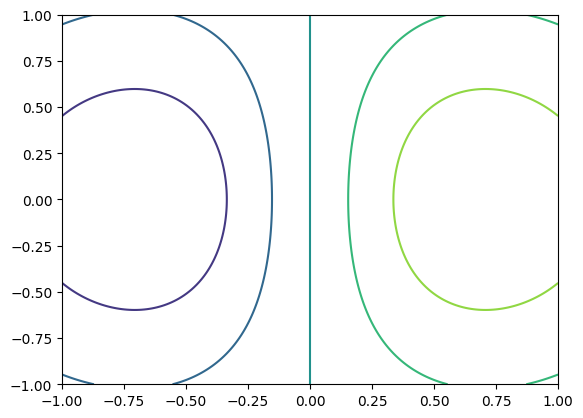

Valores que optimizan la función = [[-0.6714237]] [[0.95208564]]
Mínimo en = [[-0.17279804]]


<Figure size 640x480 with 0 Axes>

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

def f(x, y):
    return x * np.exp(-x ** 2 - y ** 2)

plotN = 200
x = np.linspace(-1, 1, plotN)
y = np.linspace(-1, 1, plotN)

x, y = np.meshgrid(x, y)

z = f(x, y)

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade=False)
plt.show()
plt.contour(x, y, z)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# Aptitud de los individuos
def aptitud_i(x_i):
    aptitud = np.zeros(len(x_i))
    for i in range(len(x_i)):
        if f(x_i[i, 0], x_i[i, 1]) >= 0:
            aptitud[i] = 1 / (1 + f(x_i[i, 0], x_i[i, 1]))
        else:
            aptitud[i] = 1 + abs(f(x_i[i, 0], x_i[i, 1]))
    return aptitud

# Ruleta
def ruleta(aptitud):
    pi = np.zeros(len(aptitud))
    for i in range(len(aptitud)):
        pi[i] = aptitud[i] / sum(aptitud)
    return pi

## Selección
def seleccion(aptitud):
    r = random.uniform(0, 1)
    p_sum = 0
    pi = ruleta(aptitud)
    for i in range(len(aptitud)):
        p_sum = p_sum + pi[i]
        if p_sum >= r:
            n = i
            return n
    n = len(x_i)
    return n

# Cruza
def cruza(xp, xm):
    pc = random.randint(0, dimension - 1)
    y1 = copy.copy(xp)
    y2 = copy.copy(xm)
    y1[pc:] = copy.copy(xm[pc:])
    y2[pc:] = copy.copy(xp[pc:])
    return [y1, y2]

# Mutación
def mutacion(y):
    for i in range(len(y)):
        for j in range(dimension - 1):
            if random.uniform(0, 1) < pm:
                y[i, j] = x_lower[j] + (x_upper[j] - x_lower[j]) * random.uniform(0, 1)
    return y

# Algoritmo genético
import random
import copy

iter = range(1, 300)  # Número de iteraciones / generaciones
dimension = 2
x_lower = np.array([-2, -2])  # Cota mínima
x_upper = np.array([2, 2])  # Cota máxima
g = np.zeros(len(iter))
pm = 0.7

## Generar población inicial
population = 50
x_i = np.zeros((population, 2))  # Población inicial
for i in range(0, population):
    x_i[i, :] = x_lower + (x_upper - x_lower) * np.array([random.uniform(0, 1), random.uniform(0, 1)])

## Iterar GA
for i in iter:
    aptitud = aptitud_i(x_i)
    r1 = seleccion(aptitud)
    r2 = seleccion(aptitud)
    y = np.zeros((population, dimension))

    for i in range(0, population, 2):
        xp = seleccion(aptitud)
        xm = seleccion(aptitud)
        while r2 == r1:
            r2 = seleccion(aptitud)

        [y1, y2] = cruza(x_i[xp, :], x_i[xm, :])
        y[i, :] = y1
        y[i + 1, :] = y2

    y = mutacion(y)
    x_i = copy.copy(y)

aptitud = aptitud_i(x_i)
mejor = max(aptitud)
index = np.where(aptitud == mejor)
print("Valores que optimizan la función =", x_i[index, 0], x_i[index, 1])
print("Mínimo en =", f(x_i[index, 0], x_i[index, 1]))
